# Ипотечный калькулятор 
Реализовал два метода подсчета:

__В аннуитентном__ методе расчитывается по формуле:


$$ P = S \cdot \frac{r \cdot (1 + r)^n}{(1 + r)^n - 1}  $$, где 

$P$ = ежемесечная выплата

$S$ = сумма кредита за вычетом первоначального взноса

$r$ = месячная процентная ставка (доля от единицы)

$n$ = общее количесвто платежей



__В дифференцированном__ методе ежемесечная выплата считается по формуле:


$$ P_t = \frac{S}{n} + \left(S - \frac{S}{n} \cdot (t-1)\right) \cdot r $$, где 

$P_t$ = ежемесечная выплата в месяце $t$

$S$ = сумма кредита за вычетом первоначального взноса

$r$ = месячная процентная ставка (доля от единицы)

$n$ = общее количесвто платежей

$t$ = номер текущего месяца платежа


Введите сумму кредита: 20000000
Введите годовую процентную ставку: 15
Введите срок кредита в месяцах: 240


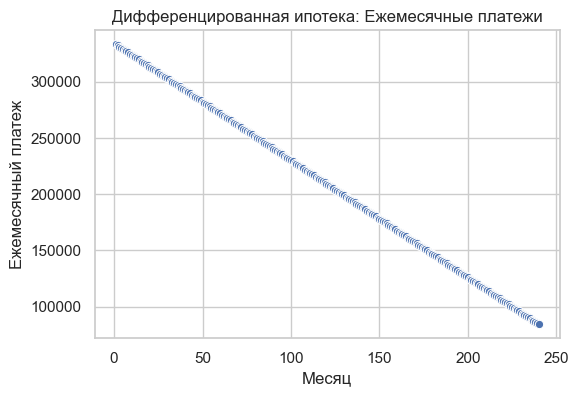

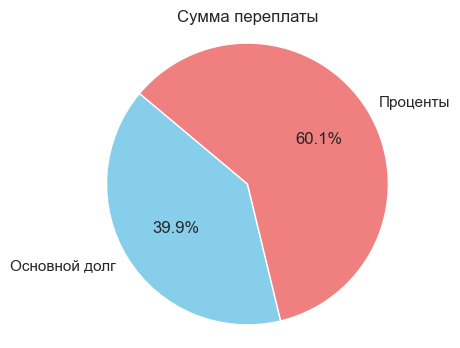

Выплачено всего: 50125000.00.
Сумма выплаченного долга: 20000000.0. 
Сумма выплаченных процентов: 30125000.000000034


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_differentiated_payment(loan_amount, annual_interest_rate, loan_term):

    monthly_interest_rate = annual_interest_rate / 12 / 100
    
    principal_payment = loan_amount / loan_term
    
    payments_data = []
    remaining_loan_amount = loan_amount
    total_interest = 0
    
    for month in range(1, loan_term + 1):
        
        interest_payment = remaining_loan_amount * monthly_interest_rate
        total_payment = principal_payment + interest_payment
        payments_data.append([month, round(total_payment, 2)])  
        remaining_loan_amount -= principal_payment
        total_interest += interest_payment
    
    
    payments_df = pd.DataFrame(payments_data, columns=['Месяц', 'Ежемесячный платеж'])
    return payments_df, total_interest


loan_amount = float(input("Введите сумму кредита: "))  
annual_interest_rate = float(input("Введите годовую процентную ставку: "))  
loan_term = int(input("Введите срок кредита в месяцах: ")) 


monthly_payments_df, total_interest = calculate_differentiated_payment(loan_amount, annual_interest_rate, loan_term)
monthly_payments_df.head(10)


sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.lineplot(data=monthly_payments_df, x='Месяц', y='Ежемесячный платеж', marker='o', color='b')
plt.title('Дифференцированная ипотека: Ежемесячные платежи')
plt.xlabel('Месяц')
plt.ylabel('Ежемесячный платеж')
plt.show()


total_overpayment = total_interest + loan_amount


plt.figure(figsize=(4, 4))
plt.pie([loan_amount, total_interest], labels=['Основной долг', 'Проценты'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Сумма переплаты')
plt.axis('equal')
plt.show()

print(f'Выплачено всего: {total_overpayment:.2f}.\nСумма выплаченного долга: {loan_amount}. \nСумма выплаченных процентов: {total_interest}')

 

In [14]:
def calc_annuity_factor(r, t):
    return r * ((1 + r)**t) / (((1 + r)**t) - 1)

def calc_annuity_payment(P, r):
    return P * r

def _annuity_payments(P, r, n):
    
    payments = []
    total_interest = 0
    
    for month in range(1, n + 1):
        
        annuity_payment = calc_annuity_payment(P, r)
        total_interest += annuity_payment - P * r
        payments.append(annuity_payment)
        
    return total_interest


P = float(input("Введите сумму кредита: "))  
annual_interest_rate = float(input("Введите годовую процентную ставку: "))  
r = annual_interest_rate / 12 / 100  
n = int(input("Введите срок кредита в месяцах: "))  


annuity_factor = calc_annuity_factor(r, n)
monthly_payment = calc_annuity_payment(P, annuity_factor)
print(f'Ежемесячный платеж составит: {round(monthly_payment, 2)}')




Введите сумму кредита: 7444500
Введите годовую процентную ставку: 19.5
Введите срок кредита в месяцах: 240
Ежемесячный платеж составит: 123553.73
